Simple Linear Regression


In [28]:
#import the libraries
import numpy
import matplotlib 
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

#Student regression function
def studentReg(ages_train, net_worths_train):
  reg=LinearRegression().fit(ages_train,net_worths_train) #Creating an object of Linear Regression and fitting it to the training data
  return reg #Return the trained model

random.seed(42)
numpy.random.seed(42)

ages = []
for ii in range(250): #Create a list to store random ages
  ages.append( random.randint(18,60)) #Filling the list with random integers between 18 and 60.

#Generating net_worth by multiplying with 6.25 taking it as slope
net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
ages       = numpy.reshape(numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape(numpy.array(net_worths), (len(net_worths), 1))

#Here, train_test_split function splits data into two subsets(training data and testing data)
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

#Passing training data to Linear regression model
reg1 = studentReg(ages_train, net_worths_train)

print("Coefficient : ",reg1.coef_)
print("Intercept : ",reg1.intercept_)

#Checking Score of the model
print("Testing data",reg1.score(ages_test, net_worths_test))
print("Training data",reg1.score(ages_train, net_worths_train))




Coefficient :  [[6.37965668]]
Intercept :  [-8.70557252]
Testing data 0.8116086750779895
Training data 0.803940029787304


# Regression plot
Here we will use the regplot function on seaborn library to visualize how the best fit line looks based on training data. 

Text(0.5, 1.0, 'Regression Plot')

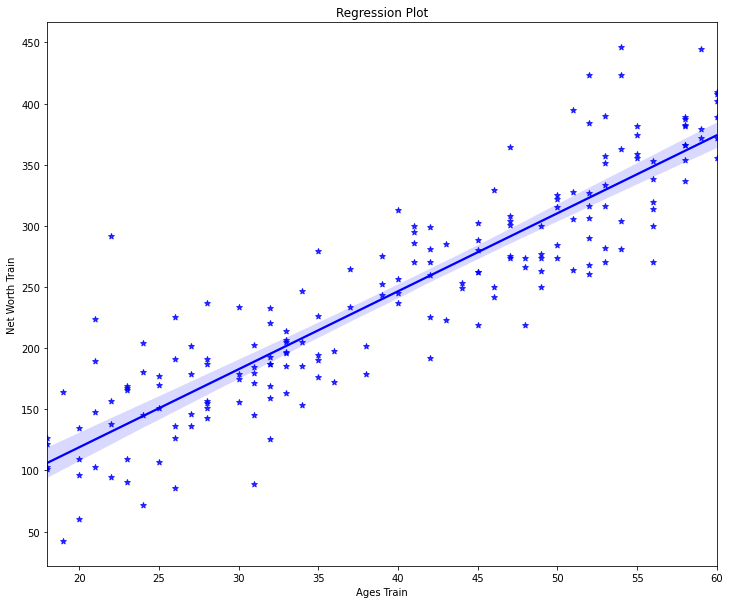

In [26]:
plt.figure(figsize=(12,10))
sns.regplot(x=ages_train,y=net_worths_train,scatter=True,color='blue',marker='*')
plt.xlabel("Ages Train")
plt.ylabel("Net Worth Train")
plt.title("Regression Plot")

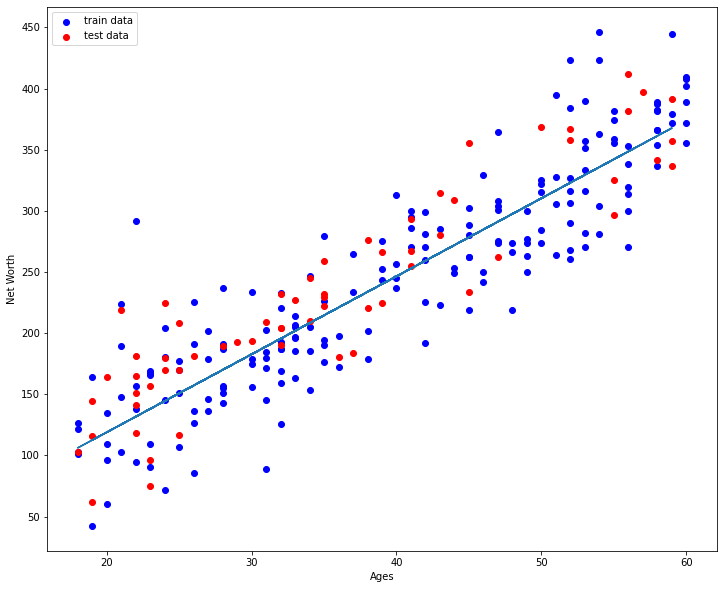

In [27]:

plt.figure(figsize=(12,10))
plt.scatter(ages_train, net_worths_train, color="blue", label="train data")
plt.scatter(ages_test, net_worths_test, color="red", label="test data")
plt.plot(ages_test,reg1.predict(ages_test))
#labelling x-axis and y-axis
plt.xlabel("Ages")
plt.ylabel("Net Worth")
plt.legend(loc=2)
plt.show()